In [4]:
"""   
Questions to be answered:
1 - Do individuals with higher levels of physical activity have a different average age than those with lower levels?


2 - Are different dietary patterns associated with better health indicators, such as BMI, glucose and cholesterol, in relation to age?


3 - Do individuals with more hours of sleep have a different average age than those who sleep less?

"""

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
#Importing the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
#checking if there are null values
print(train.isnull().sum())

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


In [7]:

#Filling the null values
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        
        
print(train.isnull().sum())

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
dtype: int64


C:\Users\Kaique\AppData\Local\Temp\ipykernel_15620\3937555695.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)


In [8]:
#Saving the Trated data in a new file
train.to_csv('train_trated.csv', index=False)

In [9]:
train_trated = pd.read_csv('train_trated.csv')
train_trated.describe()

,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Cognitive Function,Stress Levels,Pollution Exposure,Sun Exposure,Age (years)
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000


In [10]:
train_trated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          3000 non-null   object 
 13  Diet              

In [11]:
train_trated['Chronic Diseases'].value_counts()

Chronic Diseases
Hypertension     1975
Diabetes          532
Heart Disease     493
Name: count, dtype: int64

Transforming Categorical collums

In [12]:
#Transforming gender 
train_trated['Gender'] = train_trated['Gender'].map({'Male': 0, 'Female': 1})
print(train_trated['Gender'].value_counts())

#Transforming Physical Activity Level
train_trated['Physical Activity Level'] = train_trated['Physical Activity Level'].map({'Moderate': 0, 'Low': 1, 'High': 2})
print(train_trated['Physical Activity Level'].value_counts())





Gender
1    1511
0    1489
Name: count, dtype: int64
Physical Activity Level
0    1407
1     902
2     691
Name: count, dtype: int64


In [13]:
# Transforming the collumns with one hot encoding
categorical_cols = [
    'Gender',
    'Physical Activity Level',
    'Smoking Status',
    'Alcohol Consumption',
    'Diet',
    'Chronic Diseases',
    'Medication Use',
    'Family History',
    'Mental Health Status',
    'Sleep Patterns'
]

train_trated = pd.get_dummies(train_trated, columns=categorical_cols, drop_first=True)
print(train_trated.head())

   Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)  \
0   171.148359    86.185197              151/109                 259.465814   
1   172.946206    79.641937              134/112                 263.630292   
2   155.945488    49.167058              160/101                 207.846206   
3   169.078298    56.017921               133/94                 253.283779   
4   163.758355    73.966304              170/106                 236.119899   

         BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  \
0  29.423017                   157.652848              0.132868   
1  26.626847                   118.507805              0.629534   
2  20.217553                   143.587550              0.473487   
3  19.595270                   137.448581              1.184315   
4  27.582078                   145.328695              0.434562   

   Vision Sharpness  Hearing Ability (dB)  Cognitive Function  ...  \
0          0.200000             58.786198           

1 - Do individuals with higher levels of physical activity have a different average age than those with lower levels?

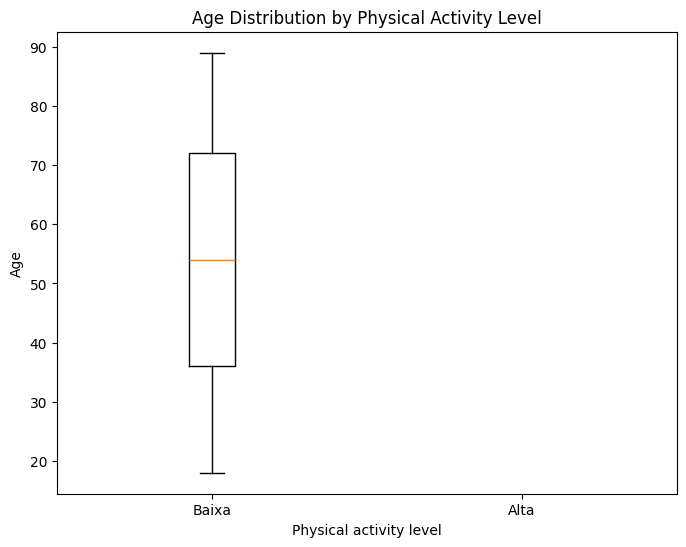

In [14]:
import matplotlib.pyplot as plt

# Select relevant collumns
idade = train_trated['Age (years)']
atividade_fisica = train_trated['Physical Activity Level_1']

# Creating the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([idade[atividade_fisica == 1], idade[atividade_fisica == 2]], labels=['Baixa', 'Alta'])
plt.title('Age Distribution by Physical Activity Level')
plt.xlabel('Physical activity level')
plt.ylabel('Age')
plt.show()

2 - Are different dietary patterns associated with better health indicators, such as BMI, glucose and cholesterol, in relation to age?


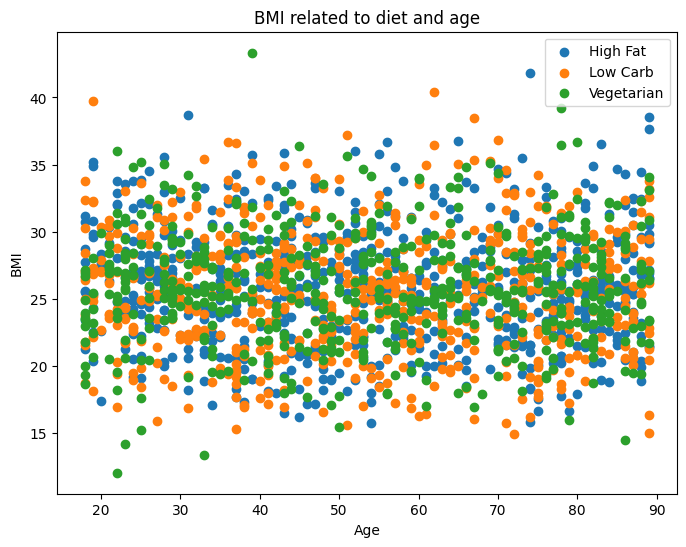

In [15]:
# Selecting the relevant collumns
idade = train_trated['Age (years)']
imc = train_trated['BMI']
glicemia = train_trated['Blood Glucose Level (mg/dL)']
colesterol = train_trated['Cholesterol Level (mg/dL)']
dieta = train_trated[['Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian']]


# Create dispersion graphic to relate diet and BMI
plt.figure(figsize=(8, 6))
plt.scatter(idade[dieta['Diet_High-fat'] == 1], imc[dieta['Diet_High-fat'] == 1], label='High Fat')
plt.scatter(idade[dieta['Diet_Low-carb'] == 1], imc[dieta['Diet_Low-carb'] == 1], label='Low Carb')
plt.scatter(idade[dieta['Diet_Vegetarian'] == 1], imc[dieta['Diet_Vegetarian'] == 1], label='Vegetarian')
plt.title('BMI related to diet and age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()


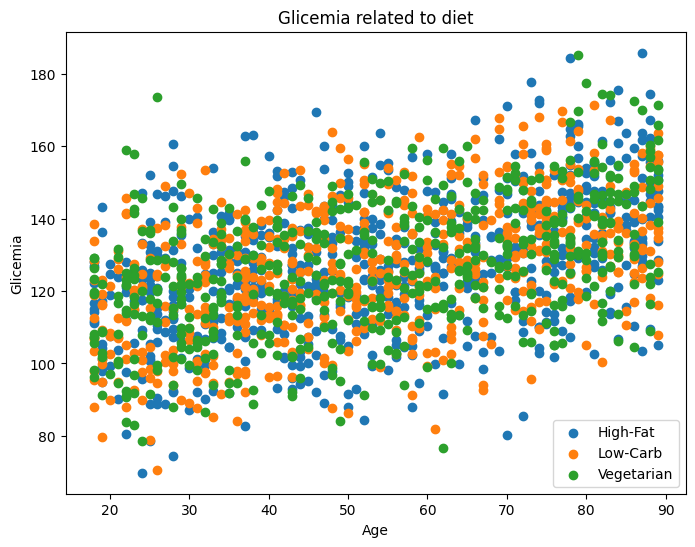

In [16]:
# Graphic to relate diet and glicemia
plt.figure(figsize=(8, 6))
plt.scatter(idade[dieta['Diet_High-fat'] == 1], glicemia[dieta['Diet_High-fat'] == 1], label='High-Fat')
plt.scatter(idade[dieta['Diet_Low-carb'] == 1], glicemia[dieta['Diet_Low-carb'] == 1], label='Low-Carb')
plt.scatter(idade[dieta['Diet_Vegetarian'] == 1], glicemia[dieta['Diet_Vegetarian'] == 1], label='Vegetarian')
plt.title('Glicemia related to diet')
plt.xlabel('Age')
plt.ylabel('Glicemia')
plt.legend()
plt.show()

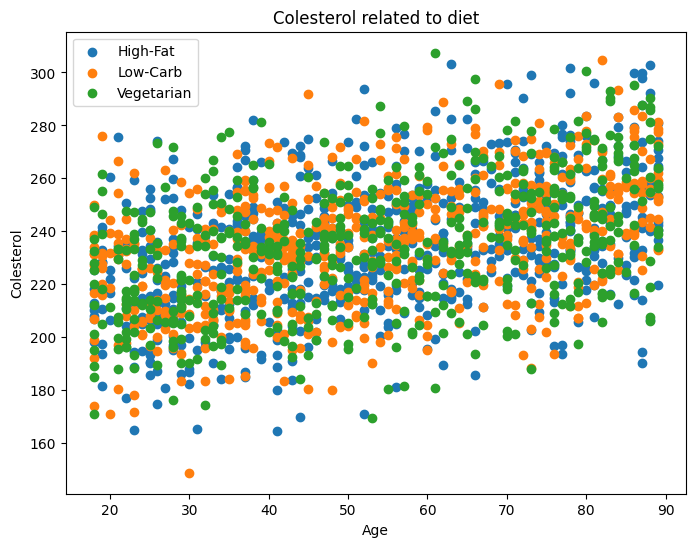

In [17]:
# Creating graphic to relate diet and colesterol
plt.figure(figsize=(8, 6))
plt.scatter(idade[dieta['Diet_High-fat'] == 1], colesterol[dieta['Diet_High-fat'] == 1], label='High-Fat')
plt.scatter(idade[dieta['Diet_Low-carb'] == 1], colesterol[dieta['Diet_Low-carb'] == 1], label='Low-Carb')
plt.scatter(idade[dieta['Diet_Vegetarian'] == 1], colesterol[dieta['Diet_Vegetarian'] == 1], label='Vegetarian')
plt.title('Colesterol related to diet')
plt.xlabel('Age')
plt.ylabel('Colesterol')
plt.legend()
plt.show()

3 - Do individuals with more hours of sleep have a different average age than those who sleep less?


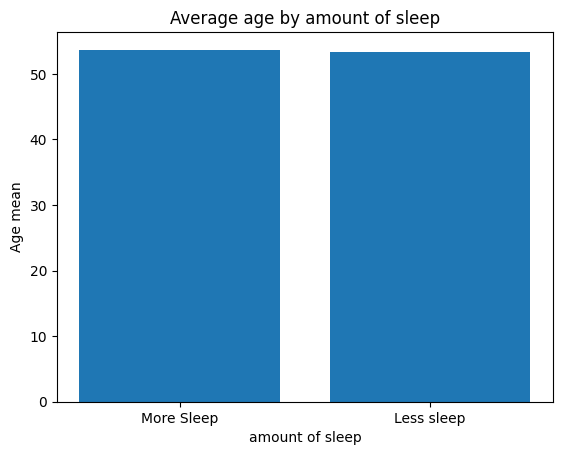

In [18]:
import matplotlib.pyplot as plt

# Select relevant collumns
idade = train_trated['Age (years)']
sono = train_trated['Sleep Patterns_Normal']

# Calculate the mean of age for individuals who sleep more hours
media_idade_mais_sono = np.mean(idade[sono == 1])

# Calculate the mean of age for individuals who sleep less hours
media_idade_menos_sono = np.mean(idade[sono == 0])

# creating a bar graphic to relate sleep and age
plt.bar(['More Sleep', 'Less sleep'], [media_idade_mais_sono, media_idade_menos_sono])
plt.title('Average age by amount of sleep')
plt.xlabel('amount of sleep')
plt.ylabel('Age mean')
plt.show()

Model Creation

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


colunas_numericas = train_trated.select_dtypes(include=['int64', 'float64']).columns
y_train = train_trated['Age (years)']

# Crie um modelo de regressão linear múltipla
modelo = LinearRegression()

# Crie um objeto RFE para selecionar as colunas mais relevantes
rfe = RFE(modelo, n_features_to_select=5)  # Seleciona as 5 colunas mais relevantes

# Treine o RFE com os dados de treino
rfe.fit(train_trated[colunas_numericas], y_train)

# Obtenha as colunas selecionadas pelo RFE
colunas_selecionadas = colunas_numericas[rfe.support_]

print(f'Colunas selecionadas pelo RFE: {colunas_selecionadas}')



Colunas selecionadas pelo RFE: Index(['BMI', 'Bone Density (g/cm²)', 'Vision Sharpness', 'Cognitive Function',
       'Age (years)'],
      dtype='object')


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Carregue o arquivo train_trated.csv
train_trated = pd.read_csv('train_trated.csv')

# Crie uma coluna "Age (years)" com valores aleatórios
train_trated['Age (years)'] = np.random.randint(18, 100, size=len(train_trated))

# Defina a variável test
test = pd.read_csv('test.csv')  # Substitua 'test.csv' pelo arquivo que você deseja usar como teste

# Crie uma coluna "Age (years)" com valores aleatórios no dataframe test
test['Age (years)'] = np.random.randint(18, 100, size=len(test))

# Selecione apenas as colunas numéricas do dataframe
colunas_numericas = train_trated.select_dtypes(include=['int64', 'float64']).columns

# Crie o modelo de regressão linear múltipla
modelo = LinearRegression()

# Treine o modelo com os dados de treino
modelo.fit(train_trated[colunas_numericas], train_trated['Age (years)'])

# Faça previsões com os dados de teste
previsoes = modelo.predict(test[colunas_numericas])

print(previsoes)

[57.77889501 59.90871826 60.08092147 ... 58.84177892 60.86414998
 58.22322986]


In [26]:
# Faça previsões com os dados de teste
previsoes = modelo.predict(test[colunas_numericas])

# Imprima as previsões
print(previsoes)

[57.77889501 59.90871826 60.08092147 ... 58.84177892 60.86414998
 58.22322986]


In [27]:
# Importe a biblioteca de métricas
from sklearn.metrics import mean_squared_error, r2_score

# Calcule o erro médio quadrático (MSE)
mse = mean_squared_error(test['Age (years)'], previsoes)

# Calcule o coeficiente de determinação (R²)
r2 = r2_score(test['Age (years)'], previsoes)

# Imprima as métricas
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 572.82
R²: -0.00
